In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from py import metrics

## **Distance metric**

### We are using Euclidean distance

$d(q, p) = \sqrt{(q_{1} - p_{1})^2 + (q_{2} - p_{2})^2 + ... + (q_{n} - p_{n})^2}$

<blockquote>  
    $ = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 }$
</blockquote>

In [2]:
def getNeighbours(data, corePoint, eps):
    def EuclideanDistance(p1, p2):
        return  np.sqrt(np.sum(np.square(p1 - p2)))
    neighbours = []
    for i in range(len(data)):
        dist = EuclideanDistance(data[i], data[corePoint])
        if dist < eps:
            neighbours.append(i)
    return neighbours

In [3]:
def dbScan(data, eps, MinPts):
    """
    Impletmentation of Density-based spatial clustering of applications with noise(DBSCAN) 
    @param Input Data
    @param epsilon value
    @param Minimum number of points
    @return Predicted labels by DBSCAN clustering
    """
    def growCluster(data, labels, corePoint, neighbours, clusterID, eps, MinPts):
        labels[corePoint] = clusterID
        i = 0
        while i < len(neighbours):    
            nh = neighbours[i]

            if labels[nh] == -1:
                labels[nh] = clusterID

            elif labels[nh] == 0:
                labels[nh] = clusterID

                PnNeighbours = getNeighbours(data, nh, eps)

                if len(PnNeighbours) >= MinPts:
                    neighbours = neighbours + PnNeighbours
            i += 1
    labels = np.zeros(len(data))
    clusterID = 0
    for p in range(len(data)):
        if labels[p] == 0:
            neighbours = getNeighbours(data, p, eps)
            if len(neighbours) < MinPts:
                labels[p] = -1
            else:
                clusterID += 1
                growCluster(data, labels, p, neighbours, clusterID, eps, MinPts)
    return labels

In [4]:
def numNoise(labels):
    """
    @param labels: Predicted labels
    @return number of noise determined by cluster algorithm 
    """
    return int(abs(np.sum(labels[labels < 0])))
    
def nClusters(labels):
    """
    @param labels: Predicted labels
    @return number of cluseters 
    """
    return len(np.unique(labels[labels > 0]))

In [5]:
# For Datasets visit http://cs.joensuu.fi/sipu/datasets/
pathBased = pd.read_csv('./Dataset/path_based.csv', names = ['value_1', 'value_2', 'true_label'],  header=None)
pbX = pathBased.iloc[:,[0,1]]
pby = pathBased.iloc[:,[2]]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


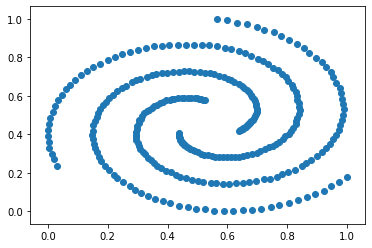

In [6]:
for column in pbX.columns:
    pbX[column] = (pbX[column] - pbX[column].min())/(pbX[column].max() - pbX[column].min())
plt.scatter(pbX['value_1'],pbX['value_2'])
plt.show()

In [7]:
sT = time.time()
labels = dbScan(pbX.values, 0.12, 4)
eT = time.time()
numClusters = nClusters(labels)
pby['predict_label'] = labels

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


DBSCAN took 2.130 seconds
number of clusters = 3
number of noise points = 0
Adjusted rand index = 1.000 took 0.05 seconds  
silhoutte score = 0.00137 took 22.91 seconds


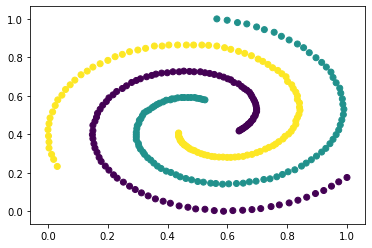

In [8]:
print('DBSCAN took {:.3f} seconds'.format(eT-sT))
print('number of clusters = {}'.format(numClusters))
print('number of noise points = {}'.format(numNoise(labels)))

ARI, ri_time = metrics.adjustRandIndex(pby['true_label'], pby['predict_label'], len(pathBased))
print('Adjusted rand index = {:.3f} took {:.2f} seconds  '.format(ARI, ri_time))

silhouette_score, ss_time = metrics.silhouetteScore(pbX, labels, numClusters)
print('silhouette score = {:.5f} took {:.2f} seconds'.format(silhouette_score, ss_time))

plt.scatter(pbX['value_1'],pbX['value_2'], c = labels)
plt.show()

# But wait !! We have low silhouette score

## This is where you gotta be careful.
The silhouette score is not always useful. Even though the DBSCAN did a very job finiding the clusters, the silhouette score is still low. This is because the some of the points within each cluster is far to each other than from the different cluster. This is where the adjusted rand index helps. 

<img src="img.png" width="500" height="500">


In [9]:
r15 = pd.read_csv('./Dataset/R15.txt', sep = '\t', header = None, names = ['value_1', 'value_2', 'true_label'])
r15X = r15.iloc[:,[0,1]]
r15y = r15.iloc[:,[2]]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


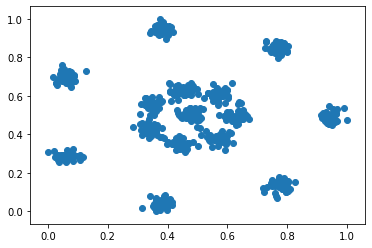

In [10]:
for column in r15X.columns:
    r15X[column] = (r15X[column] - r15X[column].min())/(r15X[column].max() - r15X[column].min())
plt.scatter(r15X['value_1'],r15X['value_2'])
plt.show()

In [11]:
sT = time.time()
labels = dbScan(r15X.to_numpy(), 0.21, 4)
eT = time.time()
r15y['predict_label'] = labels
numClusters = nClusters(labels)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


DBSCAN took 6.453 seconds
number of clusters = 7
number of noise points = 0
Adjusted rand index =  0.19973279893119572
silhoutte score = 0.54334 took 78.39 seconds


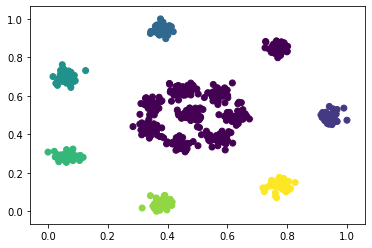

In [12]:
print('DBSCAN took {:.3f} seconds'.format(eT-sT))
print('number of clusters = {}'.format(numClusters))
print('number of noise points = {}'.format(numNoise(labels)))

ARI, ri_time = metrics.adjustRandIndex(r15y['true_label'], r15y['predict_label'], len(r15))
print('Adjusted rand index = ', ARI)

silhouette_score, ss_time = metrics.silhouetteScore(r15X, labels, numClusters)
print('silhouette score = {:.5f} took {:.2f} seconds'.format(silhouette_score, ss_time))

plt.scatter(r15X['value_1'],r15X['value_2'], c = labels)
plt.show()

In [13]:
agg = pd.read_csv('./Dataset/Aggregation.txt', sep = '\t', header = None, names = ['value_1', 'value_2', 'true_label'])
aggX = agg.iloc[:,[0,1]]
aggy = agg.iloc[:,[2]]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


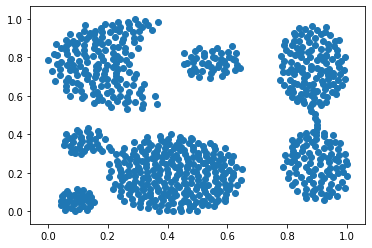

In [14]:
for column in aggX.columns:
    aggX[column] = (aggX[column] - aggX[column].min())/(aggX[column].max() - aggX[column].min())
plt.scatter(aggX['value_1'],aggX['value_2'])
plt.show()

In [15]:
sT = time.time()
labels = dbScan(aggX.to_numpy(), 0.15, 3)
eT = time.time()
aggy['predict_label'] = labels
numClusters = nClusters(labels)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


DBSCAN took 13.018 seconds
number of clusters = 1
number of noise points = 0
Adjusted rand index = 0.000 took 0.09 seconds
silhoutte score = 0.00000 took 0.00 seconds


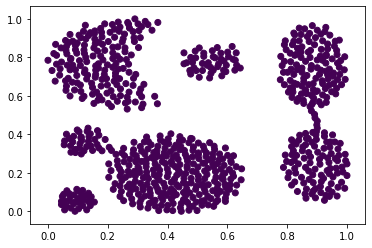

In [16]:
print('DBSCAN took {:.3f} seconds'.format(eT-sT))
print('number of clusters = {}'.format(numClusters))
print('number of noise points = {}'.format(numNoise(labels)))

ARI, ri_time = metrics.adjustRandIndex(aggy['true_label'], aggy['predict_label'], len(agg))
print('Adjusted rand index = {:.3f} took {:.2f} seconds'.format(ARI, ri_time))

silhouette_score, ss_time = metrics.silhouetteScore(aggX, labels, numClusters)
print('silhouette score = {:.5f} took {:.2f} seconds'.format(silhouette_score, ss_time))

plt.scatter(aggX['value_1'],aggX['value_2'], c = labels)
plt.show()